In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np 

In [3]:
# Loading  "tips" dataset from seaborn
tips = sns.load_dataset('tips')



In [5]:
# view dataset
print("Data Head:")
tips.head()

Data Head:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
# Checking data types
print("\nData Info:")
tips.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


##### Plot 1: Histogram — Understanding Total Bills

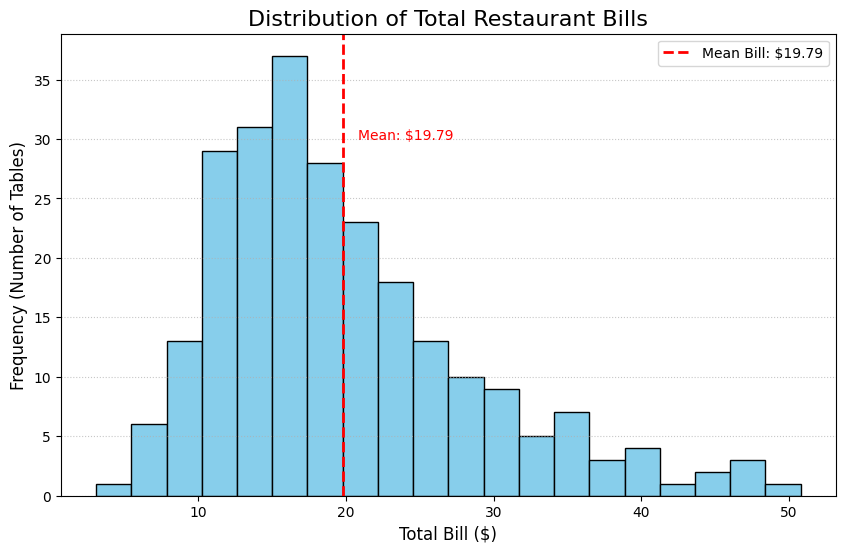

In [12]:
# mean (average) bill
mean_bill = tips['total_bill'].mean()

plt.figure(figsize=(10, 6))
# Plot the histogram
plt.hist(tips['total_bill'], bins=20, color='skyblue', edgecolor='black')

# Adding a vertical line for the mean
plt.axvline(mean_bill, color='red', linestyle='--', linewidth=2, label=f'Mean Bill: ${mean_bill:.2f}')

# Add a text annotation to the mean bill
plt.text(mean_bill + 1, 30, f'Mean: ${mean_bill:.2f}', color='red')

# Add titles and labels
plt.title('Distribution of Total Restaurant Bills', fontsize=16)
plt.xlabel('Total Bill ($)', fontsize=12)
plt.ylabel('Frequency (Number of Tables)', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.7)

plt.savefig('tips_histogram.png')

##### Insight: 
This plot shows us that most bills are between 10 and 20 dollars. The distribution is "right-skewed," meaning there are a few very large bills that pull the mean (average) bill higher than the most common bill.

##### Plot 2: Scatter Plot — Relationship Between Bill and Tip

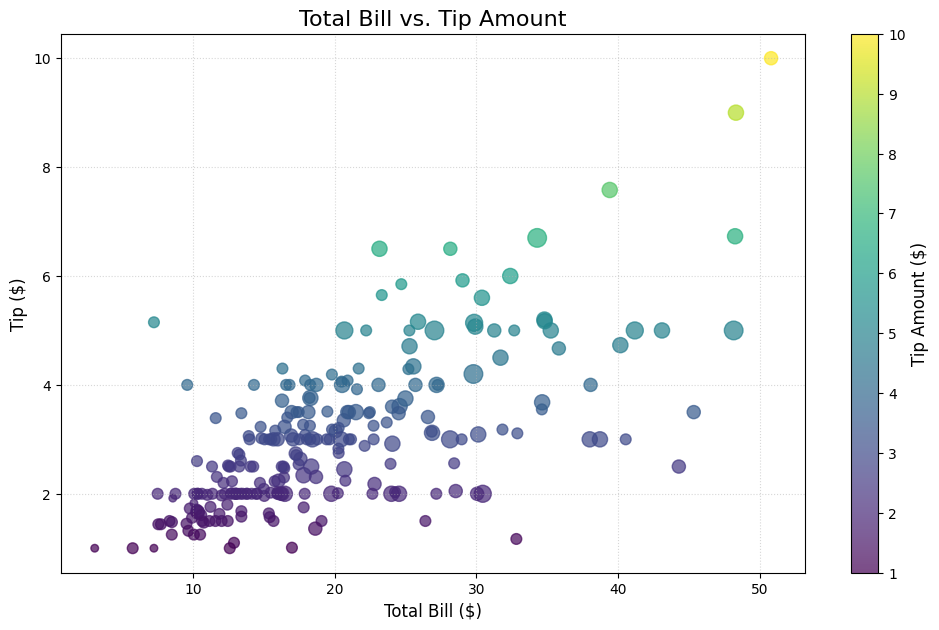

In [18]:
plt.figure(figsize=(12, 7))

# Create the scatter plot
# c = color, s = size, cmap = colormap, alpha = transparency
scatter = plt.scatter(
    tips['total_bill'], 
    tips['tip'], 
    c=tips['tip'], # Color by tip amount
    s=tips['size'] * 30, # Size by party size
    cmap='viridis', 
    alpha=0.7
)

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Tip Amount ($)', fontsize=12)

# Add titles and labels
plt.title('Total Bill vs. Tip Amount', fontsize=16)
plt.xlabel('Total Bill ($)', fontsize=12)
plt.ylabel('Tip ($)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.5)

plt.savefig('tips_scatter_plot.png')

This plot clearly shows a strong positive relationship: as the total bill increases, the tip amount also increases. The size of the dot (party size) also seems related; larger parties (bigger dots) tend to have higher bills and higher tips.

##### Plot 3: Bar Chart — Average Tip by Day

C:\Users\New\AppData\Local\Temp\ipykernel_4536\1173750823.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_avg_tip = tips.groupby('day')['tip'].mean().reset_index()


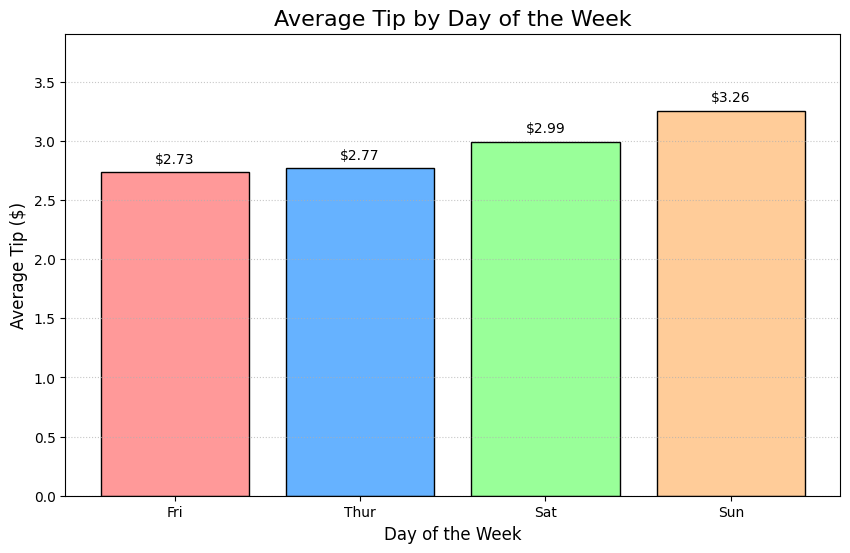

In [30]:
# 1. Prepare the data
daily_avg_tip = tips.groupby('day')['tip'].mean().reset_index()
# Sort for better comparison (optional but good practice)
daily_avg_tip = daily_avg_tip.sort_values(by='tip')

plt.figure(figsize=(10, 6))

# Define colors for our bars
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# 2. Create the bar plot
bars = plt.bar(daily_avg_tip['day'], daily_avg_tip['tip'], color=colors, edgecolor='black')

# 3. Add text labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, # Horizontal position
        yval + 0.05, # Vertical position (just above the bar)
        f'${yval:.2f}', # The text
        ha='center', # Horizontal alignment
        va='bottom' # Vertical alignment
    )

# Add titles and labels
plt.title('Average Tip by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Tip ($)', fontsize=12)
plt.ylim(0, daily_avg_tip['tip'].max() * 1.2) # Give 20% extra space at top
plt.grid(axis='y', linestyle=':', alpha=0.7)

plt.savefig('tips_bar_chart.png')

This chart shows that Sunday (Sun) and Saturday (Sat) have the highest average tips, while Thursday (Thur) and Friday (Fri) are lower.

##### Plot 4: Box Plots : Comparing Tip Distributions

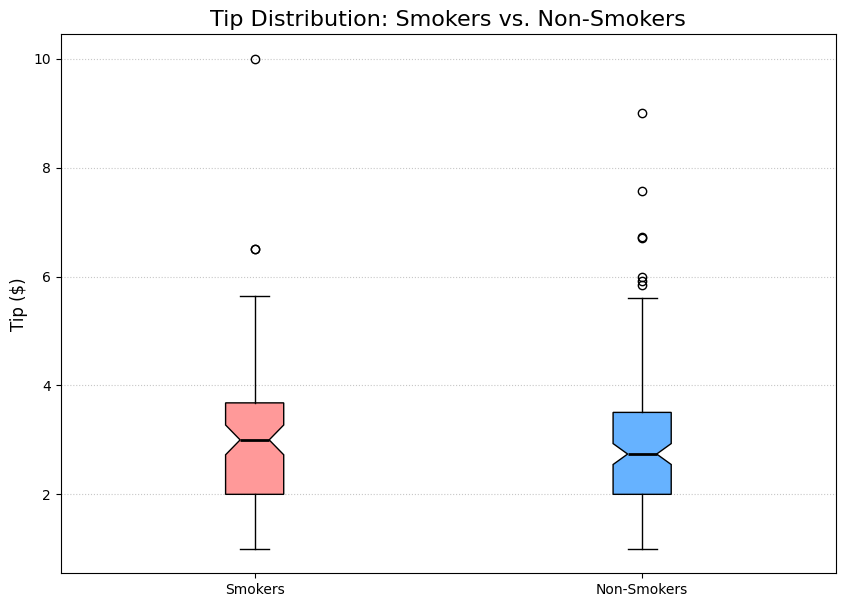

In [40]:
# 1. Prepare data: create a list of arrays
smoker_tips = tips[tips['smoker'] == 'Yes']['tip']
non_smoker_tips = tips[tips['smoker'] == 'No']['tip']
data_to_plot = [smoker_tips, non_smoker_tips]

plt.figure(figsize=(10, 7))

# 2. Create the box plot
# patch_artist=True is required to fill boxes with color
bp = plt.boxplot(
    data_to_plot, 
    notch=True, # Adds the notch
    patch_artist=True, 
    tick_labels=['Smokers', 'Non-Smokers'] # X-axis labels
)

# 3. Customize colors
colors = ['#FF9999', '#66B2FF']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Customize median line
for median in bp['medians']:
    median.set(color='black', linewidth=2)

# Add titles and labels
plt.title('Tip Distribution: Smokers vs. Non-Smokers', fontsize=16)
plt.ylabel('Tip ($)', fontsize=12)
plt.grid(axis='y', linestyle=':', alpha=0.7)

plt.savefig('tips_box_plot.png')

##### This plot gives a much richer story than a simple bar chart of averages. We can see:

1) The median tip (the black line) is very similar for both groups.

2) The "box" (the middle 50% of data) for non-smokers is tighter, meaning their tip amounts are more consistent.

3) Non-smokers have more "outliers" (the dots), indicating a few very generous tips.

##### Plot 5: Subplots — A Data Dashboard

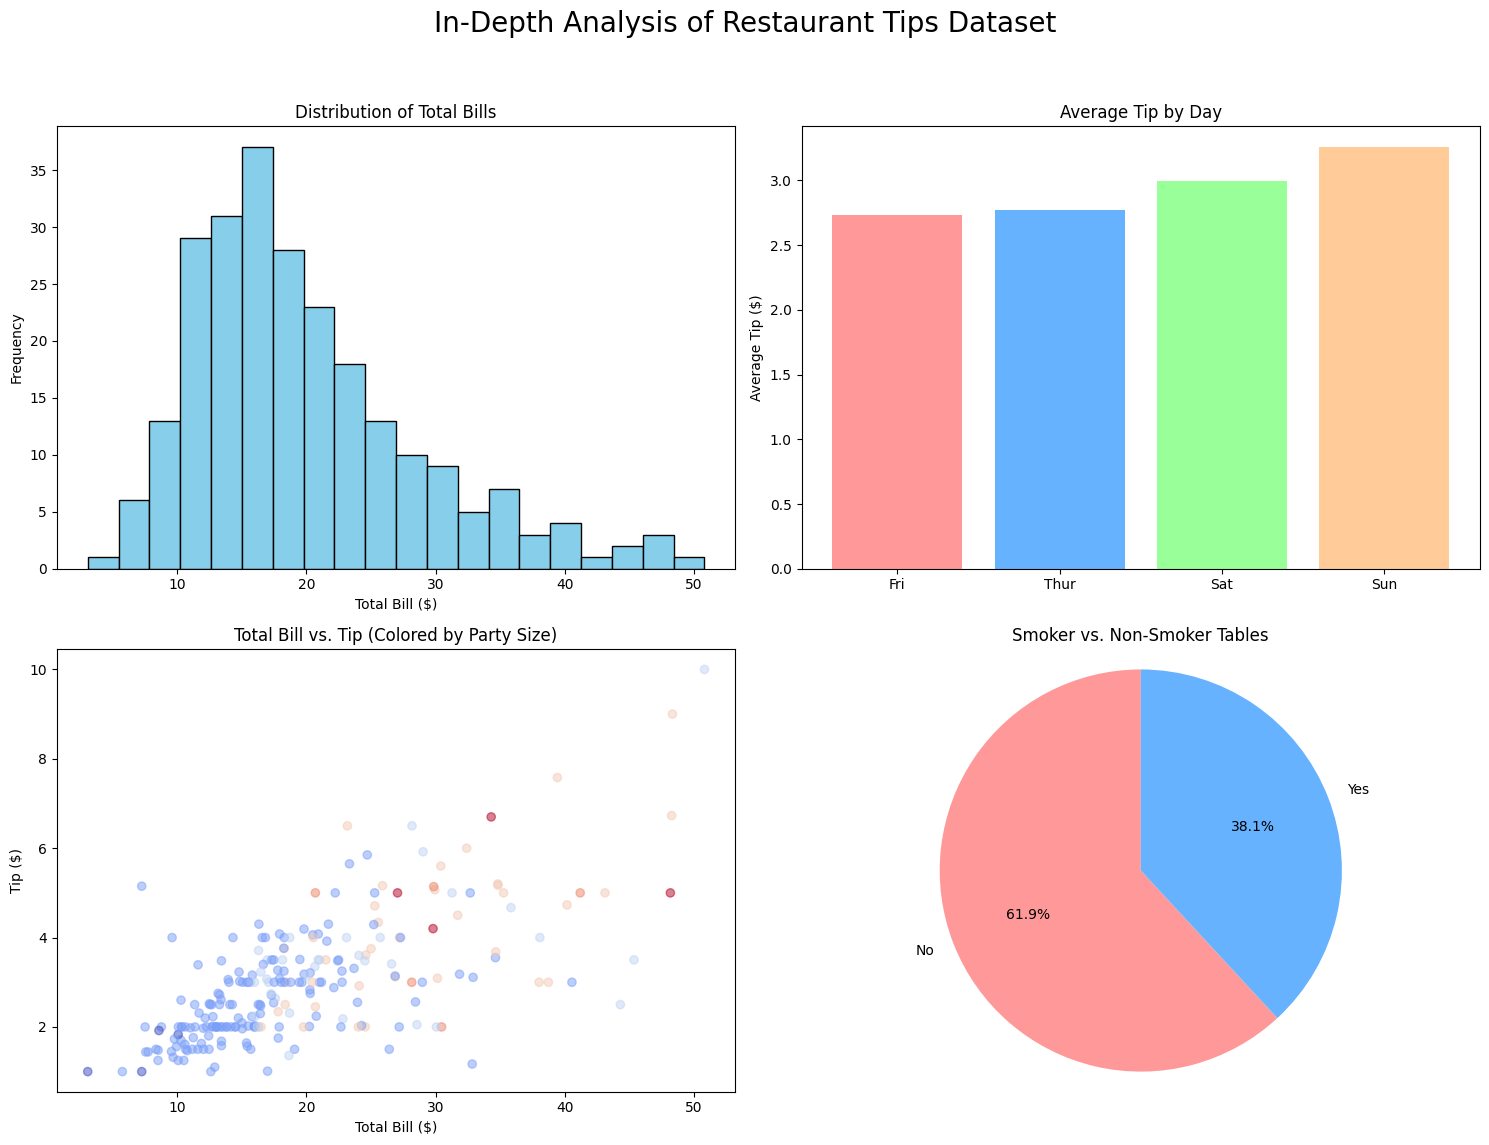

In [44]:
# Create a 2x2 grid of subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# --- Plot 1 (Top-Left): Histogram of Total Bill ---
ax[0, 0].hist(tips['total_bill'], bins=20, color='skyblue', edgecolor='black')
ax[0, 0].set_title('Distribution of Total Bills')
ax[0, 0].set_xlabel('Total Bill ($)')
ax[0, 0].set_ylabel('Frequency')

# --- Plot 2 (Top-Right): Average Tip by Day ---
# We already have this data from 'daily_avg_tip'
ax[0, 1].bar(daily_avg_tip['day'], daily_avg_tip['tip'], color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
ax[0, 1].set_title('Average Tip by Day')
ax[0, 1].set_ylabel('Average Tip ($)')

# --- Plot 3 (Bottom-Left): Bill vs. Tip Scatter Plot ---
ax[1, 0].scatter(tips['total_bill'], tips['tip'], alpha=0.5, c=tips['size'], cmap='coolwarm')
ax[1, 0].set_title('Total Bill vs. Tip (Colored by Party Size)')
ax[1, 0].set_xlabel('Total Bill ($)')
ax[1, 0].set_ylabel('Tip ($)')

# --- Plot 4 (Bottom-Right): Pie Chart of Smokers ---
smoker_counts = tips['smoker'].value_counts()
ax[1, 1].pie(
    smoker_counts, 
    labels=smoker_counts.index, 
    autopct='%1.1f%%', # Adds percentages
    colors=['#FF9999', '#66B2FF'], 
    startangle=90
)
ax[1, 1].set_title('Smoker vs. Non-Smoker Tables')
ax[1, 1].axis('equal') # Ensures the pie chart is a circle

# --- Final Touches ---
# Add a main title for the entire figure
plt.suptitle('In-Depth Analysis of Restaurant Tips Dataset', fontsize=20)

# Automatically adjust spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # rect leaves space for the suptitle

plt.savefig('tips_dashboard.png')

This dashboard gives a comprehensive overview of our data at a single glance. We can see the bill distribution, daily tip averages, the bill-to-tip relationship, and the overall proportion of smokers, all in one organized figure.